In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv('news_data.csv', encoding='ISO-8859-1')
df = pd.DataFrame(train_data)
df.head(5)

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


### Change first row to be label for the table

In [44]:
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'message'})

In [45]:
df.head(5)

,sentiment,message
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   message    4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


### Check all possible types of sentiments

In [47]:
df['sentiment'].value_counts()

neutral     2878
positive    1363
negative     604
Name: sentiment, dtype: int64

### Check null values

In [48]:
df.isnull().sum()

sentiment    0
message      0
dtype: int64

### Define X and y parameters

In [49]:
X = df['message']
y = df['sentiment']

In [50]:
### check what type of sentiment have the highest value ###
y.describe()

count        4845
unique          3
top       neutral
freq         2878
Name: sentiment, dtype: object

<AxesSubplot:>

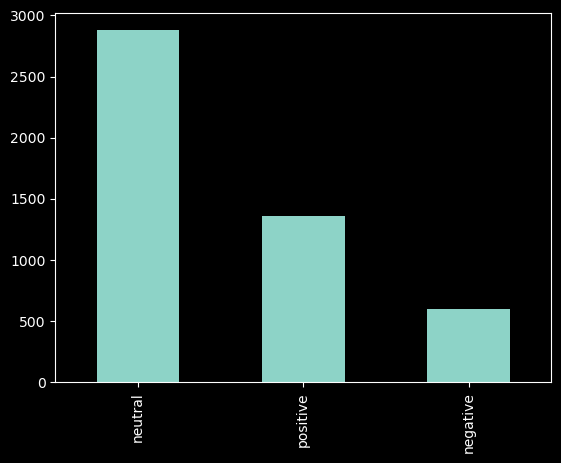

In [51]:
y.value_counts().plot.bar()

### Data preprocesing

In [52]:
### Define emojis and stop words in english

emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [53]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4')
import re
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for news in textdata:
        news = news.lower()
        
        # Replace all emojis.
        for emoji in emojis.keys():
            news = news.replace(emoji, "EMOJI" + emojis[emoji])
            
        # Replace all non alphabets.
        news = re.sub(alphaPattern, " ", news)
        
        # Replace 3 or more consecutive letters by 2 letter.
        news = re.sub(sequencePattern, seqReplacePattern, news)
        
        newswords = ''
        
        for word in news.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                newswords += (word+' ')
            
        processedText.append(newswords)
        
    return processedText
        

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/komcharnnitrat/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [54]:
message = list(df['message'])

In [55]:
import time
t = time.time()
processedtext = preprocess(message)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 0 seconds


### Train-Test Split

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### NB (Multinomial)

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

steps = [('tfidf',TfidfVectorizer(ngram_range=(1,3), max_features=500000, max_df=0.25, stop_words='english')),
         ('mnb', MultinomialNB(alpha=1e-03))]
         
mnb_pipeline = Pipeline(steps)
mnb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.25, max_features=500000,
                                 ngram_range=(1, 3))),
                ('mnb', MultinomialNB(alpha=0.001))])

In [71]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

ypred_test = mnb_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test) 
report_clf = classification_report(y_test, ypred_test) 

print(mat_clf)
print(report_clf)

[[109  56  26]
 [ 38 797 106]
 [ 39 177 251]]
              precision    recall  f1-score   support

    negative       0.59      0.57      0.58       191
     neutral       0.77      0.85      0.81       941
    positive       0.66      0.54      0.59       467

    accuracy                           0.72      1599
   macro avg       0.67      0.65      0.66      1599
weighted avg       0.72      0.72      0.72      1599

